In [2]:
import pandas as pd
import yfinance as yf
from PIL import Image
import requests
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import LSTM,Bidirectional,Dense


In [3]:
StockData= yf.download('AAPL',period="max",interval="1d")
StockData

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400


In [4]:
ma_100=StockData.Close.rolling(100).mean()
ma_200=StockData.Close.rolling(200).mean()
ma_200

Date
1980-12-12          NaN
1980-12-15          NaN
1980-12-16          NaN
1980-12-17          NaN
1980-12-18          NaN
                ...    
2023-05-17    152.02135
2023-05-18    152.09655
2023-05-19    152.14170
2023-05-22    152.18365
2023-05-23    152.21470
Name: Close, Length: 10701, dtype: float64

In [5]:
StockData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400


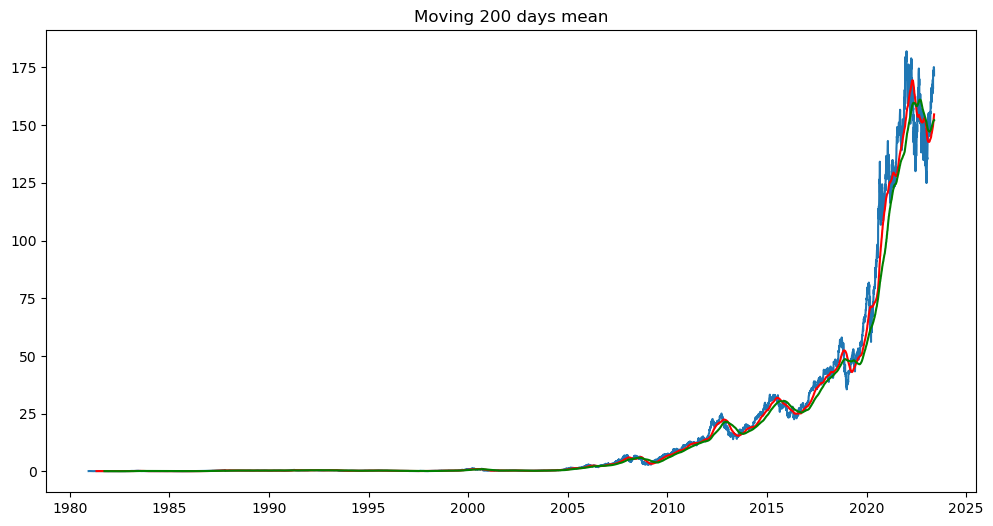

In [6]:
fig = plt.figure(figsize=(12,6))
plt.title("Moving 200 days mean")
plt.plot(StockData.Close)
plt.plot(ma_100,'r')
plt.plot(ma_200,'g')

In [7]:
StockData['TradeDate']=StockData.index
#StockData
FullData=StockData[['Close']].values

In [8]:
FullData

array([[1.28347993e-01],
       [1.21652000e-01],
       [1.12723000e-01],
       ...,
       [1.75160004e+02],
       [1.74199997e+02],
       [1.71559998e+02]])

In [9]:
for i in range(len(FullData)):
    if FullData[i]=='nan':
        imputer=KNNImputer(n_neighbours=4)
        FullData[i]=imputer.fit_transform(FullData[i])

C:\Users\Admin\AppData\Local\Temp\ipykernel_18320\84736378.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if FullData[i]=='nan':


In [10]:
FullData.shape

(10701, 1)

In [11]:
sc=MinMaxScaler() 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
print(X)
X.shape

[[4.35483657e-04]
 [3.98684577e-04]
 [3.49613595e-04]
 ...
 [9.62354598e-01]
 [9.57078702e-01]
 [9.42570092e-01]]


(10701, 1)

In [12]:
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=10  
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

print(len(x_sample))
print(len(y_sample))
print(len(X_samples))
print(len(y_samples))

10
1
10691
10691


In [13]:
TestingRecords=5
TestingRecords

5

In [14]:
X_data=np.array(X_samples)

X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)

In [15]:
y_data.shape

(10691, 1)

In [16]:

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

10686
5
10686
5


In [17]:
model = Sequential()
model.add(Bidirectional(LSTM(X_train.shape[1],return_sequences=False), input_shape=(X_train.shape[1],1)))
model.add(Dense(X_train.shape[1]))
model.add(Dense(y_train.shape[1], activation='tanh'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 50, epochs = 100)

Epoch 1/100
214/214 [==============================] - 5s 9ms/step - loss: 0.0047
Epoch 2/100
214/214 [==============================] - 2s 10ms/step - loss: 3.4400e-04
Epoch 3/100
214/214 [==============================] - 2s 9ms/step - loss: 1.9899e-04
Epoch 4/100
214/214 [==============================] - 2s 9ms/step - loss: 1.7602e-04
Epoch 5/100
214/214 [==============================] - 1s 7ms/step - loss: 1.6343e-04
Epoch 6/100
214/214 [==============================] - 2s 9ms/step - loss: 1.4717e-04
Epoch 7/100
214/214 [==============================] - 2s 9ms/step - loss: 1.3417e-04
Epoch 8/100
214/214 [==============================] - 2s 9ms/step - loss: 1.1100e-04
Epoch 9/100
214/214 [==============================] - 2s 9ms/step - loss: 8.9975e-05
Epoch 10/100
214/214 [==============================] - 2s 10ms/step - loss: 7.4381e-05
Epoch 11/100
214/214 [==============================] - 2s 9ms/step - loss: 6.7274e-05
Epoch 12/100
214/214 [==============================] 

214/214 [==============================] - 1s 6ms/step - loss: 2.9026e-05
Epoch 96/100
214/214 [==============================] - 1s 6ms/step - loss: 2.8053e-05
Epoch 97/100
214/214 [==============================] - 1s 6ms/step - loss: 2.8199e-05
Epoch 98/100
214/214 [==============================] - 2s 7ms/step - loss: 2.6064e-05
Epoch 99/100
214/214 [==============================] - 2s 8ms/step - loss: 2.8280e-05
Epoch 100/100
214/214 [==============================] - 2s 9ms/step - loss: 2.6890e-05


In [18]:
print(model.layers[0].input_shape)
print(model.layers[1].input_shape)
print(model.layers[2].input_shape)
num_hidden_layers = len(model.layers) - 1
num_hidden_layers

(None, 10, 1)
(None, 20)
(None, 10)


2

In [19]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print("Layer {} weights shape: {}".format(i, [w.shape for w in weights]))

Layer 0 weights shape: [(1, 40), (10, 40), (40,), (1, 40), (10, 40), (40,)]
Layer 1 weights shape: [(20, 10), (10,)]
Layer 2 weights shape: [(10, 1), (1,)]


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 20)               960       
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,181
Trainable params: 1,181
Non-trainable params: 0
_________________________________________________________________


In [21]:
predicted_Price = model.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print("original")
print(orig)
print('predicted')
print(predicted_Price)

1/1 [==============================] - 1s 728ms/step
original
[[172.69000244]
 [175.05000305]
 [175.16000366]
 [174.19999695]
 [171.55999756]]
predicted
[[172.60275]
 [172.77335]
 [173.59898]
 [173.892  ]
 [173.7495 ]]


In [22]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(orig, predicted_Price))
rmse

1.5821714081314144

In [23]:

data_d= yf.download('AAPL',period="max",interval="1d")
data_d=data_d[['Close']].values

[*********************100%***********************]  1 of 1 completed


In [25]:
Last10Days=data_d[-10:]
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)
predicted = model.predict(Last10Days)
predicted = DataScaler.inverse_transform(predicted)
print(predicted)

1/1 [==============================] - 0s 16ms/step
[[172.92336]]
